Les **LLM (Large Language Models)** sont des modèles d'intelligence artificielle capables de comprendre et de générer du texte humain en se basant sur de vastes ensembles de données. Ils servent à des tâches telles que la rédaction de texte, la traduction, la génération de réponses aux questions et l'analyse de sentiments. Leur utilité réside dans leur capacité à automatiser des tâches complexes liées au langage naturel dans divers domaines comme la communication, l'éducation et le service client.

In [7]:
import requests
import re
import nltk
import spacy
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk

In [8]:
# Téléchargement des ressources NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data] Error downloading 'maxent_ne_chunker' from
[nltk_data]     <https://raw.githubuserconte

True

In [1]:
!pip install transformers matplotlib --quiet


In [4]:
# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 2. Loading a pretrained model and tokenizer
model_name = "gpt2"  # GPT-2 est utilisé ici comme exemple, mais peut être remplacé par d'autres modèles comme "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence. 
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



In [10]:
# Exemple de texte
text = "La tokenisation consiste à diviser un texte en unités plus petites appelées tokens, comme des mots ou des sous-mots."

# Tokenisation avec NLTK (ou un autre tokenizer si nécessaire)
from nltk.tokenize import word_tokenize

# Appliquer la tokenisation
tokens = word_tokenize(text)

# Afficher les tokens
print(tokens)


['La', 'tokenisation', 'consiste', 'à', 'diviser', 'un', 'texte', 'en', 'unités', 'plus', 'petites', 'appelées', 'tokens', ',', 'comme', 'des', 'mots', 'ou', 'des', 'sous-mots', '.']


Original Text: La tokenisation consiste à séparer un texte en mots ou en morceaux plus petits pour mieux le comprendre.
Tokens: ['La', 'Ġtoken', 'isation', 'Ġconsist', 'e', 'ĠÃł', 'Ġs', 'Ã©', 'p', 'arer', 'Ġun', 'Ġtex', 'te', 'Ġen', 'Ġm', 'ots', 'Ġo', 'u', 'Ġen', 'Ġmor', 'ce', 'aux', 'Ġplus', 'Ġpet', 'its', 'Ġpour', 'Ġm', 'ie', 'ux', 'Ġle', 'Ġcomp', 'rend', 're', '.']
Token IDs: [14772, 11241, 5612, 3473, 68, 28141, 264, 2634, 79, 11258, 555, 48659, 660, 551, 285, 1747, 267, 84, 551, 2146, 344, 14644, 5556, 4273, 896, 12797, 285, 494, 2821, 443, 552, 10920, 260, 13]
Cleaned Tokens: ['La', 'token', 'isation', 'consist', 'e', 'Ãł', 's', 'Ã©', 'p', 'arer', 'un', 'tex', 'te', 'en', 'm', 'ots', 'o', 'u', 'en', 'mor', 'ce', 'aux', 'plus', 'pet', 'its', 'pour', 'm', 'ie', 'ux', 'le', 'comp', 'rend', 're', '.']


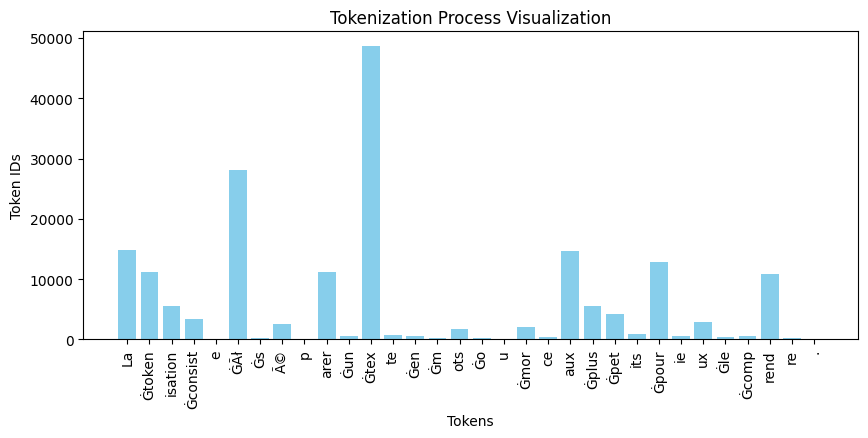

In [20]:
#"La tokenisation consiste à diviser un texte en unités plus petites appelées tokens, comme des mots ou des sous-mots."

# Importation des bibliothèques
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

# 1. Définir le texte à tokeniser
text = "La tokenisation consiste à séparer un texte en mots ou en morceaux plus petits pour mieux le comprendre."


# 2. Tokenisation du texte avec un tokenizer pré-entraîné (ici GPT-2)
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenisation du texte
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
# Nettoyer les tokens pour enlever les "Ġ" devant les mots
cleaned_tokens = [token.replace("Ġ", "") for token in tokens]

# Affichage du texte original, des tokens et de leurs identifiants
print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")
# Affichage des tokens nettoyés
print(f"Cleaned Tokens: {cleaned_tokens}")

# 3. Visualiser le processus de tokenisation
plt.figure(figsize=(10, 4))
plt.bar(tokens, token_ids, color="skyblue")
plt.xlabel("Tokens")
plt.ylabel("Token IDs")
plt.title("Tokenization Process Visualization")
plt.xticks(rotation=90)
plt.show()

In [21]:
# Analyser les préfixes spéciaux
special_prefixes = [token for token in tokens if token.startswith("Ġ")]
print(f"Tokens avec préfixe spécial 'Ġ': {special_prefixes}")

Tokens avec préfixe spécial 'Ġ': ['Ġtoken', 'Ġconsist', 'ĠÃł', 'Ġs', 'Ġun', 'Ġtex', 'Ġen', 'Ġm', 'Ġo', 'Ġen', 'Ġmor', 'Ġplus', 'Ġpet', 'Ġpour', 'Ġm', 'Ġle', 'Ġcomp']


La pré-formation est la première étape où un modèle est entraîné sur un large corpus de texte pour apprendre les bases du langage, comme la syntaxe et les relations entre les mots. Ensuite, le réglage fin ajuste ce modèle en l'entraînant sur des données spécifiques à une tâche particulière (comme la classification ou la traduction) pour qu'il soit performant dans ce domaine.

In [23]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Définir le texte d'entrée
input_text = "L'intelligence artificielle transforme rapidement le monde,"

# Charger le tokenizer et le modèle pré-entraîné (GPT-2)
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Tokenisation du texte d'entrée
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Créer un attention_mask (1 pour chaque token, 0 pour les tokens de padding)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

# Générer une sortie avec le modèle
output_ids = model.generate(input_ids, attention_mask=attention_mask, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)

# Convertir les token IDs générés en texte
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Afficher le texte d'entrée et la sortie générée
print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")


Input: L'intelligence artificielle transforme rapidement le monde,
Generated Output: L'intelligence artificielle transforme rapidement le monde, et le monde de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artificielle de l'intelligence artific
